# IE0005 - Introduction To DSAI: Cardiovascular Disease Mini Project

## Group Members and their contributions 
    

Cyrus Wong (Y2 EEE), (Slides, Research, Data Cleaning and Coding)

Liu Zimo (Y2 EEE), (Slides, Research, Data Cleaning and Coding)

Skyler Wang (Y2 EEE), (Slides, Research, Data Cleaning and Coding)

Zachary Tio (Y2 EEE), (Slides, Research, Data Cleaning and Coding)

---

## Table of Contents

### 1. Introduction: Problem Definition & Dataset used
> - 1.1 Libraries/Utilities

###  2. Exploratory Data Analysis & Visualization 

###  3. Data Preparation
> - 3.1 Data Preprocessing

###  4. Modelling

> - 4.1 Decision Tree
> - 4.2 Random Forest Regression

###  5. Conclusion

### 1. Introduction: Problem Definition & Dataset used

   According to the World Health Organisation (WHO), Cardiovascular dieases is defined as "a group of disorders of the heart and blood vessels". Some commonly known cardiovascular diseases are stroke & heart attack, which are mainly caused by a blockage; a build-up of fatty deposits on the inner walls of the blood vessels that prevents blood from flowing to the heart or brain. Based on the study of " The Burden of Disease in Singapore, 1990–2017" done by Ministry of Health of Singapore, Washington University and IHME, cardiovascular has always been the leading cause of death among adult Singaporeans aged >24 and is one of top global killers reaping lives daily.
  
  Due to the prevalence of cardiovascular diseases and its tendency to stay under the radar, it is of great importance to find it in its early stage. Hence our group decided to see if Data Science can predict cardiovascular disease. The data used will be from Kaggle's Cardiovascular Disease dataset consisting of 70 000 records of patients data along with 11 features + target.

## Problem Statement: Can Data Science models be leveraged by researchers to predict cardiovascular diseases?

### 1.1 Library/Utilities

Let us begin by importing the essential Python Libraries.

* NumPy : Library for Numeric Computations in Python  
* Pandas : Library for Data Acquisition and Preparation  
* Matplotlib : Low-level library for Data Visualization  
* Seaborn : Higher-level library for Data Visualization  
* Plotnine: Another higher-level library for Data Visualization
* Scikit-Learn: De-facto Machine Learning library in Python

In [219]:
#Code starts here
import numpy as np
import pandas as pd 
import seaborn as sb
from matplotlib import pyplot as plt
import os
%matplotlib inline

# Use the theme of ggplot
plt.style.use('ggplot')

# Set the figure size of matplotlib
plt.figure(figsize = (10,4.8))

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
# from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#Import module for data visualization
from plotnine import *
import plotnine

<Figure size 720x345.6 with 0 Axes>

###  2. Exploratory Data Analysis & Visualization 

In [220]:
cardio = pd.read_csv("cardio_train.csv",sep=";") #Extracting data from cardio_train.csv
cardio.head(n=10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [221]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### From a quick look at the data, we realise that while some of the datas are categorical in nature, all data are in integer or float type data. Hence, no hot one encoding is required to convert catergorial data (strings) into numeric data type.

We have 12 rows and 11 features 
We can omit id as a feature. Hence we currently have 10 features to work with.

Numerical data: Age, Height, Weight, ap_hi & ap_lo

* **Age** : Objective Feature | age | int (days) 
* **Height** : Objective Feature | height | int (cm) |
* **Weight** : Objective Feature | weight | float (kg) |  
* **Systolic blood pressure** : Examination Feature | ap_hi | int | 
* **Diastolic blood pressure** : Examination Feature | ap_lo | int |  

Categorical data: gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking_status, stroke.


* **Gender** : Objective Feature | gender | categorical code | 1 - women, 2 - men |
* **Cholesterol** : Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* **Glucose** : Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* **Smoking** : Subjective Feature | smoke | binary | 0:Do not smoke 1:Does smoke|
* **Alcohol intake** : Subjective Feature | alco | binary | 0:Does not drink No 1:Does drink|
* **Physical activity** : Subjective Feature | alco | binary | 0:Does not exercise No 1:Does exercise|
* **Presence or absence of cardiovascular disease** : Target Variable | cardio | binary | 0:Does not have 1:Does have|


### However, age is presented in days. As such, we will need to convert it into years

In [222]:
age0 = cardio['age'] #extracting age from the dataframe

In [223]:
age=[] #creating a list called age
for x in age0: #using for loop to change age from days into years
    int(x)
    x=round(x/365)
    age.append(x)


In [224]:
age = pd.DataFrame(age) # creating a new data frame for age 
age.rename(columns={0:'age'}, inplace=True) #renaming column name for “age”

In [225]:
cardio = cardio.drop('age', axis=1) # column for age (in days) removed from cardio
cardio.insert(loc=1, column = "age", value = age) # inserting age (in years) column to cardio

In [226]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


Similarly, we also want to know the importance of pulse pressure (PP), which is the difference between systolic blood pressure (SBP) and diastolic blood pressure (DBP), has been highlighted in determining the outcome of hypertension. A radically new concept of blood pressure burden (BPB), which is the sum of systolic blood pressure (SBP) and diastolic blood pressure (DBP) is proposed.

Likewise, we also want to know the BMI of each individual.

In [227]:
sys= cardio['ap_hi'] #extracting systolic data
sys.head(n=20) #checking first 20 data of systolic 

0     110
1     140
2     130
3     150
4     100
5     120
6     130
7     130
8     110
9     110
10    120
11    120
12    120
13    110
14    130
15    120
16    130
17    110
18    100
19    120
Name: ap_hi, dtype: int64

In [228]:
dia= cardio['ap_lo'] #extracting diastolic data
dia.head(n=20) #checking first 20 diastolic data

0      80
1      90
2      70
3     100
4      60
5      80
6      80
7      90
8      70
9      60
10     80
11     80
12     80
13     70
14     90
15     80
16     70
17     70
18     70
19     70
Name: ap_lo, dtype: int64

Systolic blood pressure (ap_hi): Pressure on blood vessels when the heart pumps blood and contracts/beats.

Diastolic blood pressure (ap_lo): Pressure when the heart relaxes between beats.

add: Blood Pressure

diff: Pulse Pressure

In [229]:
add = [] #list named add created
diff = [] #list named diff created
for i in range(len(sys)): #for loop created
    item = sys[i]-dia[i]
    item1= sys[i]+dia[i]
    add.append(item1) #append systolic + diastolic values
    diff.append(item) #append systolic - diastolic values


In [230]:
diff = pd.DataFrame(diff)
add = pd.DataFrame(add)
diff.head() #checking values for diff

,0
0,30
1,50
2,60
3,50
4,40


In [231]:
diff.head() #checking values for add

,0
0,30
1,50
2,60
3,50
4,40


In [232]:
diff = pd.DataFrame(diff) # dataframe for diff created
diff.rename(columns={0:'diff'}, inplace=True) # renaming column of diff to diff
add = pd.DataFrame(add) # dataframe for add created
add.rename(columns={0:'add'}, inplace=True) # renaming column of add to add

In [233]:
cardio.insert(loc=7, column = "add", value = add) # inserting add column to cardio
cardio.insert(loc=7, column = "diff", value = diff) # inserting diff column to cardio

In [234]:
cardio["bmi"] = round(cardio["weight"] / (cardio["height"]/100)**2)  #insert bmi column to cardio
# bmi = pd.DataFrame(cardio["bmi"]) 

In [235]:
cardio.head() #check if BMI, pulse pressure and blood pressure burden concatenated to the dataframe of "cardio"

,id,age,gender,height,weight,ap_hi,ap_lo,diff,add,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,30,190,1,1,0,0,1,0,22.0
1,1,55,1,156,85.0,140,90,50,230,3,1,0,0,1,1,35.0
2,2,52,1,165,64.0,130,70,60,200,3,1,0,0,0,1,24.0
3,3,48,2,169,82.0,150,100,50,250,1,1,0,0,1,1,29.0
4,4,48,1,156,56.0,100,60,40,160,1,1,0,0,0,0,23.0


0    35021
1    34979
Name: cardio, dtype: int64


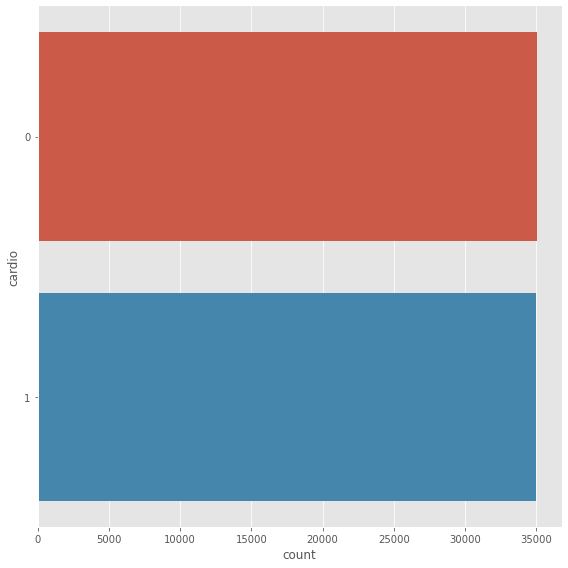

In [236]:
# Checking the no. of individuals who has cardiovascular disease
print(cardio["cardio"].value_counts())
sb.catplot(y = "cardio", data = cardio, kind = "count", height = 8)


#### The number of individuals who has cardiovascular disease is close to a 50 - 50 chance. This is hinting that we are working with a balanced data set that is not skewed before cleaning

In [237]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(cardio[["age", "height", "weight", "ap_hi", "ap_lo"]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

,age,height,weight,ap_hi,ap_lo
count,70000.00,70000.00,70000.00,70000.00,70000.00
mean,53.34,164.36,74.21,128.82,96.63
std,6.77,8.21,14.40,154.01,188.47
min,30.00,55.00,10.00,-150.00,-70.00
25%,48.00,159.00,65.00,120.00,80.00
50%,54.00,165.00,72.00,120.00,80.00
75%,58.00,170.00,82.00,140.00,90.00
max,65.00,250.00,200.00,16020.00,11000.00


From the table above, we can see that the data is very skewed, with ap_hi & ap_lo having greater standard deviation than its mean. This means that for both data, the outliers within them are many and has very extreme values which is shown in ap_hi having a maximum systolic pressure of 16020 while in ap_lo having a maximum dystolic pressure of 11000 which is humanly impossible. Likewise for height and weight, while standard deviation is acceptable, the outliers value are not. Weight has a minimum value of 10kg while height as a minimum height of 55cm which is humanly impossible to be this light in weight and this short in height respectively. (The shortest person in the Gusiness World Record is only 62.8cm). There is much cleaning to do for  numerical datas in "cardio" dataset.

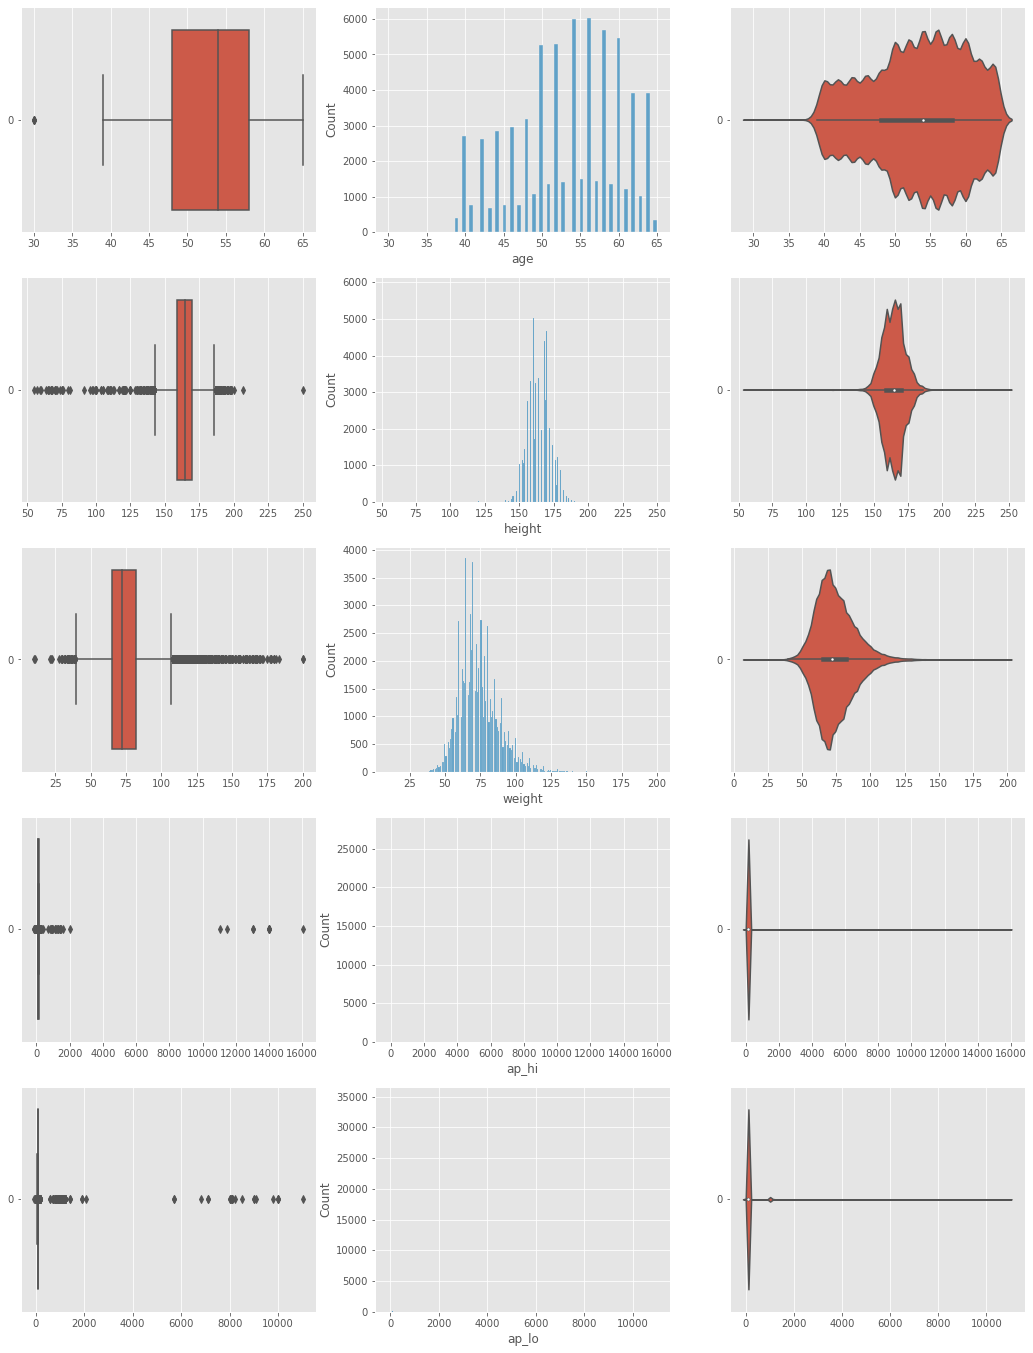

In [238]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

As seen in the box plot, histogram plot and violin plot for ap_hi & ap_lo is highly skewed suggesting existence of extreme outliers within the datasets. Likewise from the box plot of height and weight, there are many outliers or anomalies within the dataset too. The only numeric dataset that does not contain much outlier and is fairly distributed is age, yet there is also an outlier of that is of 30 years old while most age dataset falls between 48 years old to 58 years old.This is acceptable as compared to the other datasets. Hence, data preparation will concentrate mainly on ap_hi, ap_lo, height & weight.

###  3. Data Preparation
> - 3.1 Data Preprocessing

Now, we will start the data preparation process based on what we have gathered thus far in the numeric data of "cardio".

#### First, we will start with systolic & dystolic pulse. We will first remove any dataset that has systolic pulse lesser than dystolic pulse as this is impossible. 


In [239]:
keep = cardio['ap_hi']>cardio['ap_lo'] # keeping only data with diastolic<systolic (Not possible)
cardio = cardio[keep] #creating new cardio dataframe with only diastolic<systolic data
cardio.head() #ensuring that data removed is normal

,id,age,gender,height,weight,ap_hi,ap_lo,diff,add,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,30,190,1,1,0,0,1,0,22.0
1,1,55,1,156,85.0,140,90,50,230,3,1,0,0,1,1,35.0
2,2,52,1,165,64.0,130,70,60,200,3,1,0,0,0,1,24.0
3,3,48,2,169,82.0,150,100,50,250,1,1,0,0,1,1,29.0
4,4,48,1,156,56.0,100,60,40,160,1,1,0,0,0,0,23.0


In [240]:
cardio.index = pd.RangeIndex(len(cardio.index)) #reindexing the data 

#### Next, based on what is humanly possible, as long as humans are alive, it is within the realm of possibility than both the systolic and diastolic pressures can be near-zero that is before death. We are assuming that systolic and diastolic pressures measured in this dataset may contain individuals who are near death hence removing those blood pressures that are negative.
#### Similarly, the highest sytolic and diastolic pressure ever recorded is at 370/360 respectively based on a 1995 study "Influence of breathing technique on arterial blood pressure during heavy weight lifting". Based on this parameter, we will remove any systolic or diastolic pressures greater than this. 


In [241]:

keep =(cardio['ap_hi'] > 0 ) & (cardio['ap_hi'] <= 370) #keeping da
#0 --> As long as humans are alive, it is within the realm of possibility than both the systolic and diastolic pressures can be near-zero
#370/360 --> Highest ever human blood pressure recorded
cardio = cardio[keep] #creating new cardio dataframe with 0 < systolic < 370
cardio.head() #ensuring that data removed is normal
cardio.index = pd.RangeIndex(len(cardio.index)) #reindexing the data

In [242]:

keep =(cardio['ap_lo'] > 0 ) & (cardio['ap_lo'] <= 360)

#--> As long as humans are alive, it is within the realm of possibility than both the systolic and diastolic pressures can be near-zero
#370/360 --> Highest ever human blood pressure recorded


In [243]:
print(keep)
cardio = cardio[keep]  #creating new cardio dataframe with 0 < diastolic < 370
cardio.head() #ensuring that data removed is normal
cardio.index = pd.RangeIndex(len(cardio.index)) #reindexing the data

0        True
1        True
2        True
3        True
4        True
         ... 
68720    True
68721    True
68722    True
68723    True
68724    True
Name: ap_lo, Length: 68725, dtype: bool


<AxesSubplot:>

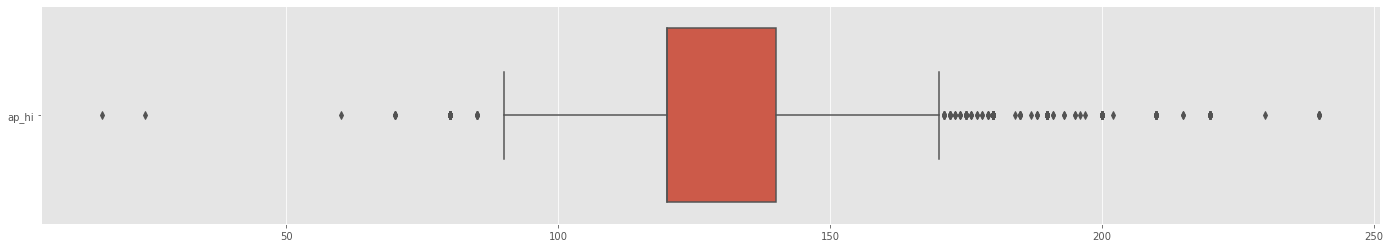

In [244]:
AP_HI = pd.DataFrame(cardio['ap_hi'])
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = AP_HI, orient = "h")

#### Systolic pressures now despite the outliers is within the humanly possible range.

<AxesSubplot:>

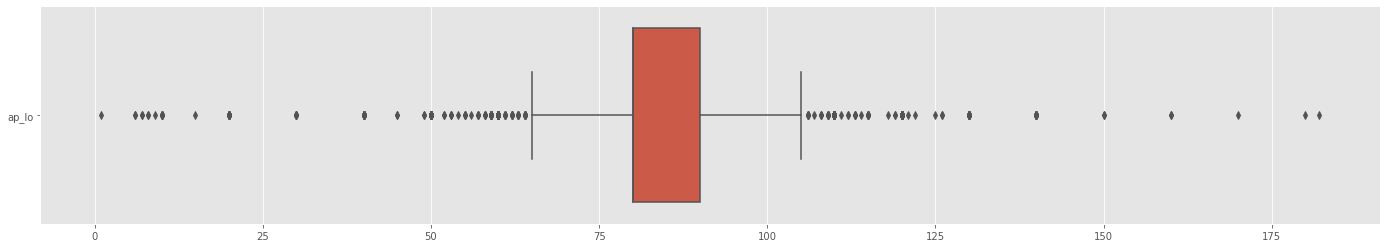

In [245]:
#Refined Boxplot for ap_hi (Systolic)

AP_LO = pd.DataFrame(cardio['ap_lo'])
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = AP_LO, orient = "h")

#### Diastolic pressures now despite the outliers is within the humanly possible range.

In [246]:
cardio.shape #Checking data point

(68709, 16)

#### Now, we will check for more anomalies within the dataset:

* Any missing data values
* Any duplicated mising values


In [247]:
cardio.describe() #Checking for more anomaly in the data

,id,age,gender,height,weight,ap_hi,ap_lo,diff,add,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000,68709.000000
mean,49973.757281,53.326347,1.348601,164.359502,74.116804,126.670072,81.272570,45.397503,207.942642,1.364654,1.225633,0.087922,0.053341,0.803388,0.494710,27.515580
std,28844.505312,6.767622,0.476531,8.191113,14.331936,16.707956,9.572289,11.761991,24.560630,0.678908,0.571476,0.283183,0.224714,0.397439,0.499976,6.076113
min,0.000000,30.000000,1.000000,55.000000,11.000000,16.000000,1.000000,4.000000,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,25003.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,40.000000,200.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000
50%,50012.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,40.000000,200.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,74867.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,50.000000,220.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,240.000000,182.000000,160.000000,380.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,299.000000


In [248]:
cardio.isnull().sum() #Checking for any missing values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
diff           0
add            0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

In [249]:
cardio.drop_duplicates(inplace=True) #Checking for any duplicated values

In [250]:
cardio.shape

(68709, 16)

#### As such, there is neither duplicate nor missing value in the dataset.

#### We will set the height and weight parameters based +- 2 standard deviation to contain minimum 99.7% of dataset. This means that if remove based on weight than height or the vice verse, we will remove 99.7%* 99.7% = 99.4009% of the remaining 68709 data points

#### For height range, the range will be 148 < weight < 181(rounded off to the nearest whole number)

#### For weight range, the range will be 45 < weight < 103 (rounded off to the nearest whole number)

In [251]:
keep =(cardio['height'] > 148 ) & (cardio['height'] <= 181) #Removing Anomaly based on Height
print(keep)
cardio = cardio[keep]

0         True
1         True
2         True
3         True
4         True
         ...  
68704     True
68705     True
68706    False
68707     True
68708     True
Name: height, Length: 68709, dtype: bool


In [252]:
cardio.index = pd.RangeIndex(len(cardio.index)) #reindexing the data

In [253]:
keep =(cardio['weight'] > 45 ) & (cardio['weight'] <= 103) #Removing Anomaly based on Weight
print(keep)
cardio = cardio[keep]

0         True
1         True
2         True
3         True
4         True
         ...  
66322     True
66323     True
66324    False
66325     True
66326     True
Name: weight, Length: 66327, dtype: bool


In [254]:
cardio.index = pd.RangeIndex(len(cardio.index)) #reindexing the data

In [255]:
cardio.shape 

(63755, 16)

#### Checking for final data point to use. Remaining data point = 63755/70000*100% = 91.079% (5 s.f.) of the initial data points. Clean less than 10% of the data needed which is accpetable statistically

<AxesSubplot:>

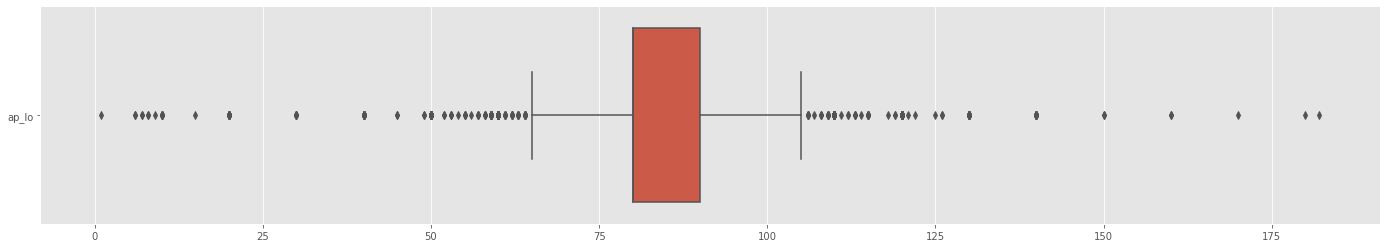

In [256]:
height = pd.DataFrame(cardio['height'])
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = AP_LO, orient = "h")

#### Despite the outliers, remaining datasets for height is more evenly distriubuted and not skewed.

<AxesSubplot:>

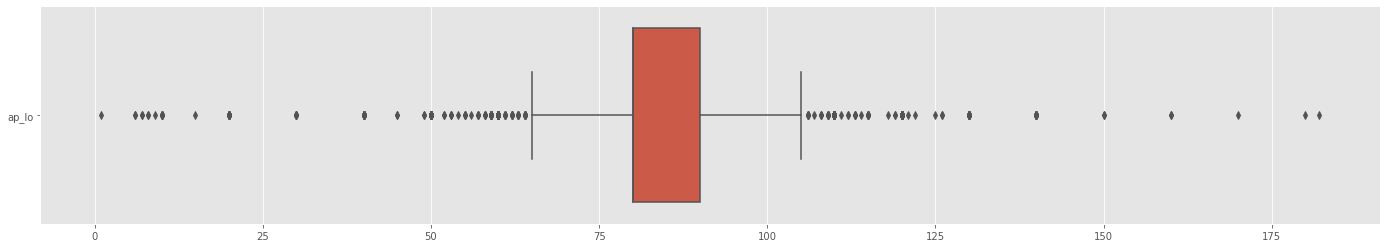

In [257]:
weight = pd.DataFrame(cardio['weight'])
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = AP_LO, orient = "h")



0    32656
1    31099
Name: cardio, dtype: int64


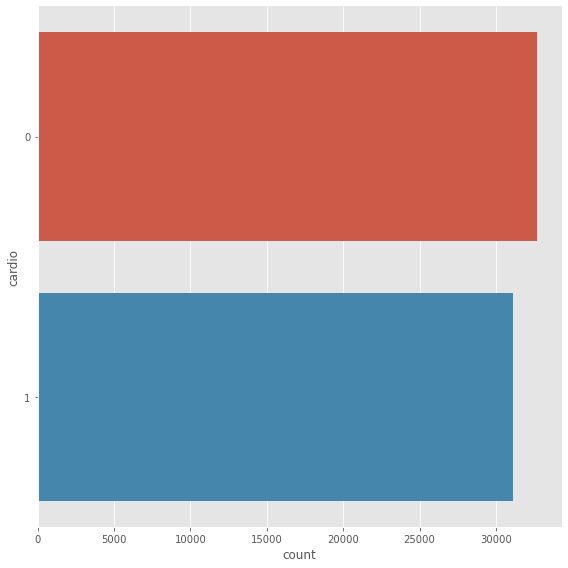

In [258]:
# Checking the no. of individuals who has cardiovascular disease after data cleaning
print(cardio["cardio"].value_counts())
sb.catplot(y = "cardio", data = cardio, kind = "count", height = 8)

In [259]:
cardio = cardio.drop(["id"], axis=1) #Predictors

In [260]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,diff,add,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000
mean,53.311756,1.342875,164.319834,72.728505,126.276700,81.091961,45.184738,207.368661,1.353698,1.218948,0.085703,0.051604,0.804470,0.487789,26.973335
std,6.758527,0.474674,6.993036,11.686066,16.397521,9.441884,11.580537,24.123575,0.670643,0.564901,0.279927,0.221228,0.396611,0.499855,4.401724
min,30.000000,1.000000,149.000000,45.800000,16.000000,6.000000,4.000000,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,40.000000,200.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000
50%,54.000000,1.000000,165.000000,71.000000,120.000000,80.000000,40.000000,200.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,58.000000,2.000000,169.000000,80.000000,140.000000,90.000000,50.000000,220.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000
max,65.000000,2.000000,181.000000,103.000000,240.000000,182.000000,160.000000,380.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,46.000000


#### Hence, it is great that even after cleaning, we get a well-balanced data set that is not skewed

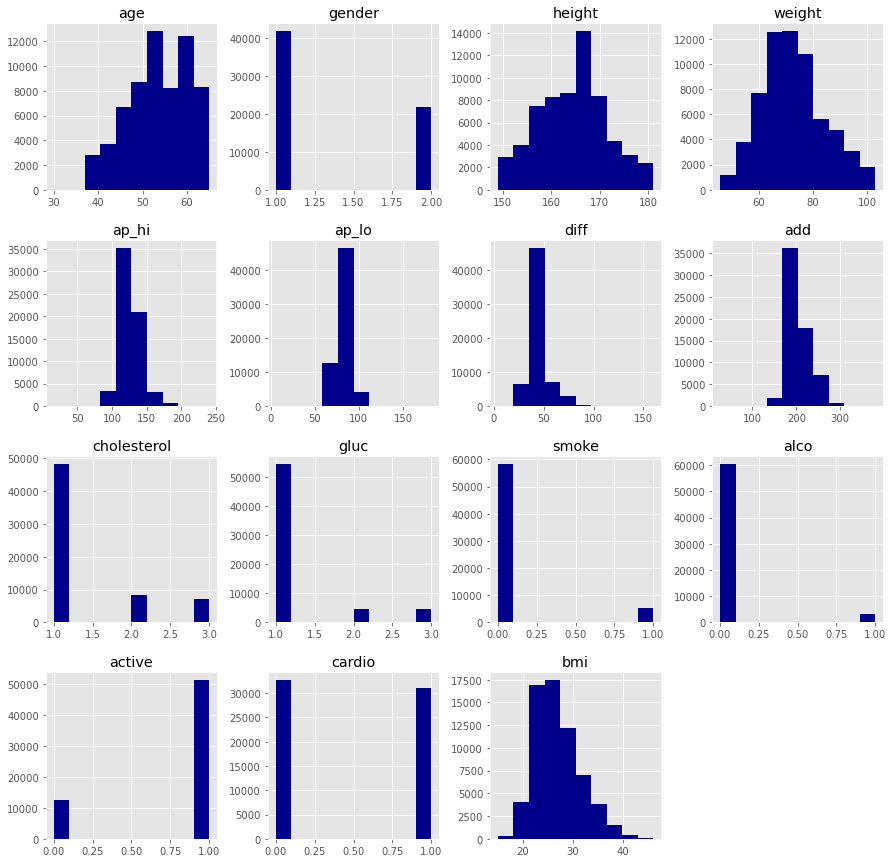

In [261]:
cardio.hist(figsize= (15,15), color = "darkblue")
plt.show()

For the above variables, we can observe the the datasets for alcohol consumption, smoking and one being active are highly disproportionate and is insufficient to withold balance. We need to take into account that datasets show the presence of an individual consuming these substances or being active but not the timestamp of the frequency of the consumptions or being active. As such, datasets may not be very useful in predicting the presence of cardiovascular disease given that its the extent of frequency of such activities that affect one getting cardiovascular disease, not by the mere presence of consuming these substances or being active.

#### Describing dataset

<AxesSubplot:>

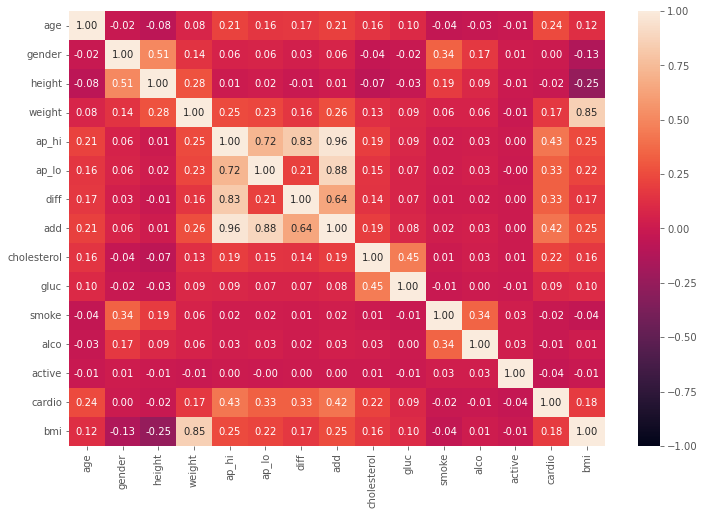

In [262]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(cardio.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [263]:
cardio = cardio.drop(["ap_hi", "ap_lo", "height", "weight", "active", "alco", "smoke", "gluc", "gender", "diff"], axis=1) #Predictors

Based on the correlation matrix, we can see that the factors with the highest correlation with presence of cardiovascular disease are ranked in descending orders:

- Blood pressure (add) : 0.42
- Age : 0.24
- Cholesterol : 0.22
- BMI: 0.18

We drop certain datasets such as id, gender, smoke, active and alco due to correlation with cardio < 0.1 and even inversely correlated to cardio based on the Correlation matrix

Similarly, we drop weight, height, ap_hi and ap_lo given that these datasets are used to make compound datasets that will have a non-linear relationship or not with cardio in the form of BMI and Pulse Pressure.

As such, we will take into account the 4 highest correlating factors for the subsequent usage in predicting models.

In [264]:
cardio.describe()

,age,add,cholesterol,cardio,bmi
count,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000
mean,53.311756,207.368661,1.353698,0.487789,26.973335
std,6.758527,24.123575,0.670643,0.499855,4.401724
min,30.000000,26.000000,1.000000,0.000000,15.000000
25%,48.000000,200.000000,1.000000,0.000000,24.000000
50%,54.000000,200.000000,1.000000,0.000000,26.000000
75%,58.000000,220.000000,1.000000,1.000000,30.000000
max,65.000000,380.000000,3.000000,1.000000,46.000000


<AxesSubplot:>

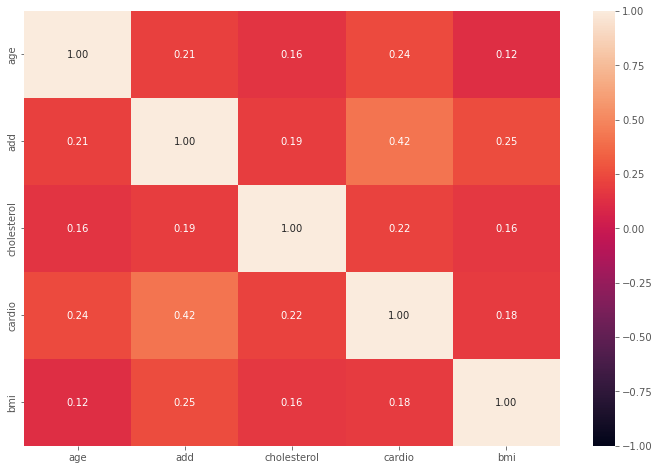

In [265]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(cardio.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

###  4. Modelling

> - 4.1 Decision Tree
> - 4.2 Random Forest Regression

### 4.1 Decision Tree

Given that the datasets used that has the highest correlating factors are mixed datas (combination of categorical and numeric data) and that some of these datasets such as BMI has a non-linear relationship, decision tree will take all of these into account and is one of the models that can be used to predict a binary outcome (where people with cardiovascular disease would be 1 and those who do not would be 0)

## Multi-variate Decision Tree

In [266]:
y = pd.DataFrame(cardio["cardio"])
x = cardio.copy()
x = cardio.drop(["cardio"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

# Summary Statistics for Response
y_train["cardio"].value_counts()

x_train.describe()

Train Set : (47816, 1) (47816, 4)
Test Set  : (15939, 1) (15939, 4)


,age,add,cholesterol,bmi
count,47816.000000,47816.000000,47816.000000,47816.000000
mean,53.296679,207.328049,1.355990,26.968086
std,6.762751,24.160878,0.672651,4.406414
min,30.000000,44.000000,1.000000,15.000000
25%,48.000000,200.000000,1.000000,24.000000
50%,54.000000,200.000000,1.000000,26.000000
75%,58.000000,220.000000,1.000000,30.000000
max,65.000000,380.000000,3.000000,46.000000


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7291701522502928

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.722755505364201



<AxesSubplot:>

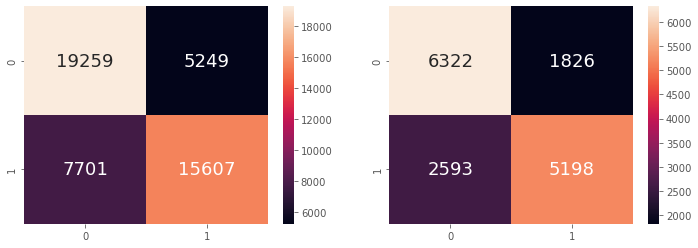

In [267]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



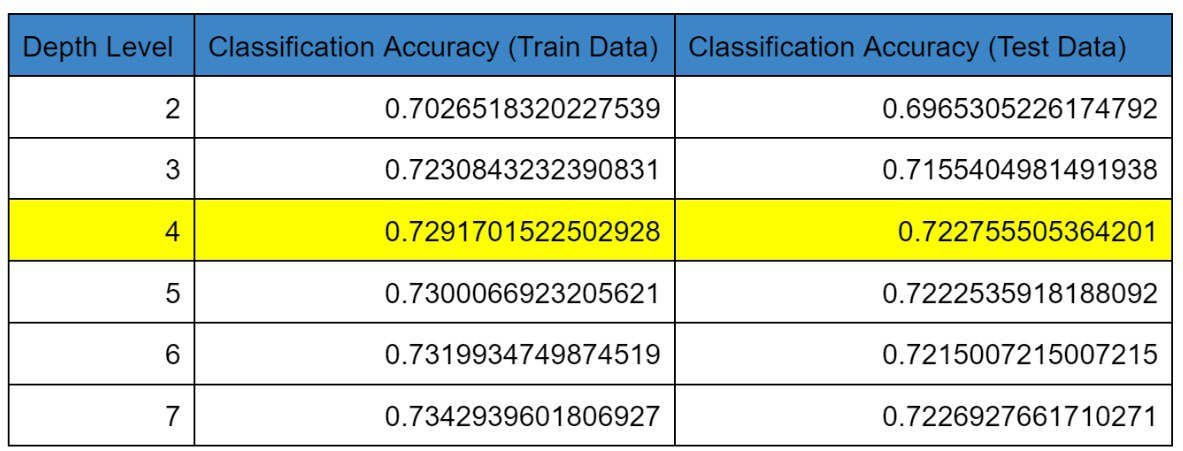

As seen from above, when we allow a max depth of 4 levels, the classification accuracy for train and test datasets reach an equilibrium point where the classification accuracy for both datasets are maximized, which means that there is no compromisation of classification accuracy of the train datasets in order to increase the classification accuracy of test dataset. This reduces the instances of overfitting of the decision tree model on train dataset for prediction of test dataset.

As seen, the error of misclassification based on the false positive and negative at this depth level of 4 is the lowest too, as compared to the other levels. Hence, with a multivariate decision tree model, it would be best to use depth level of 4 to as a model to predict whether the individual has cardiovascular disease or not.

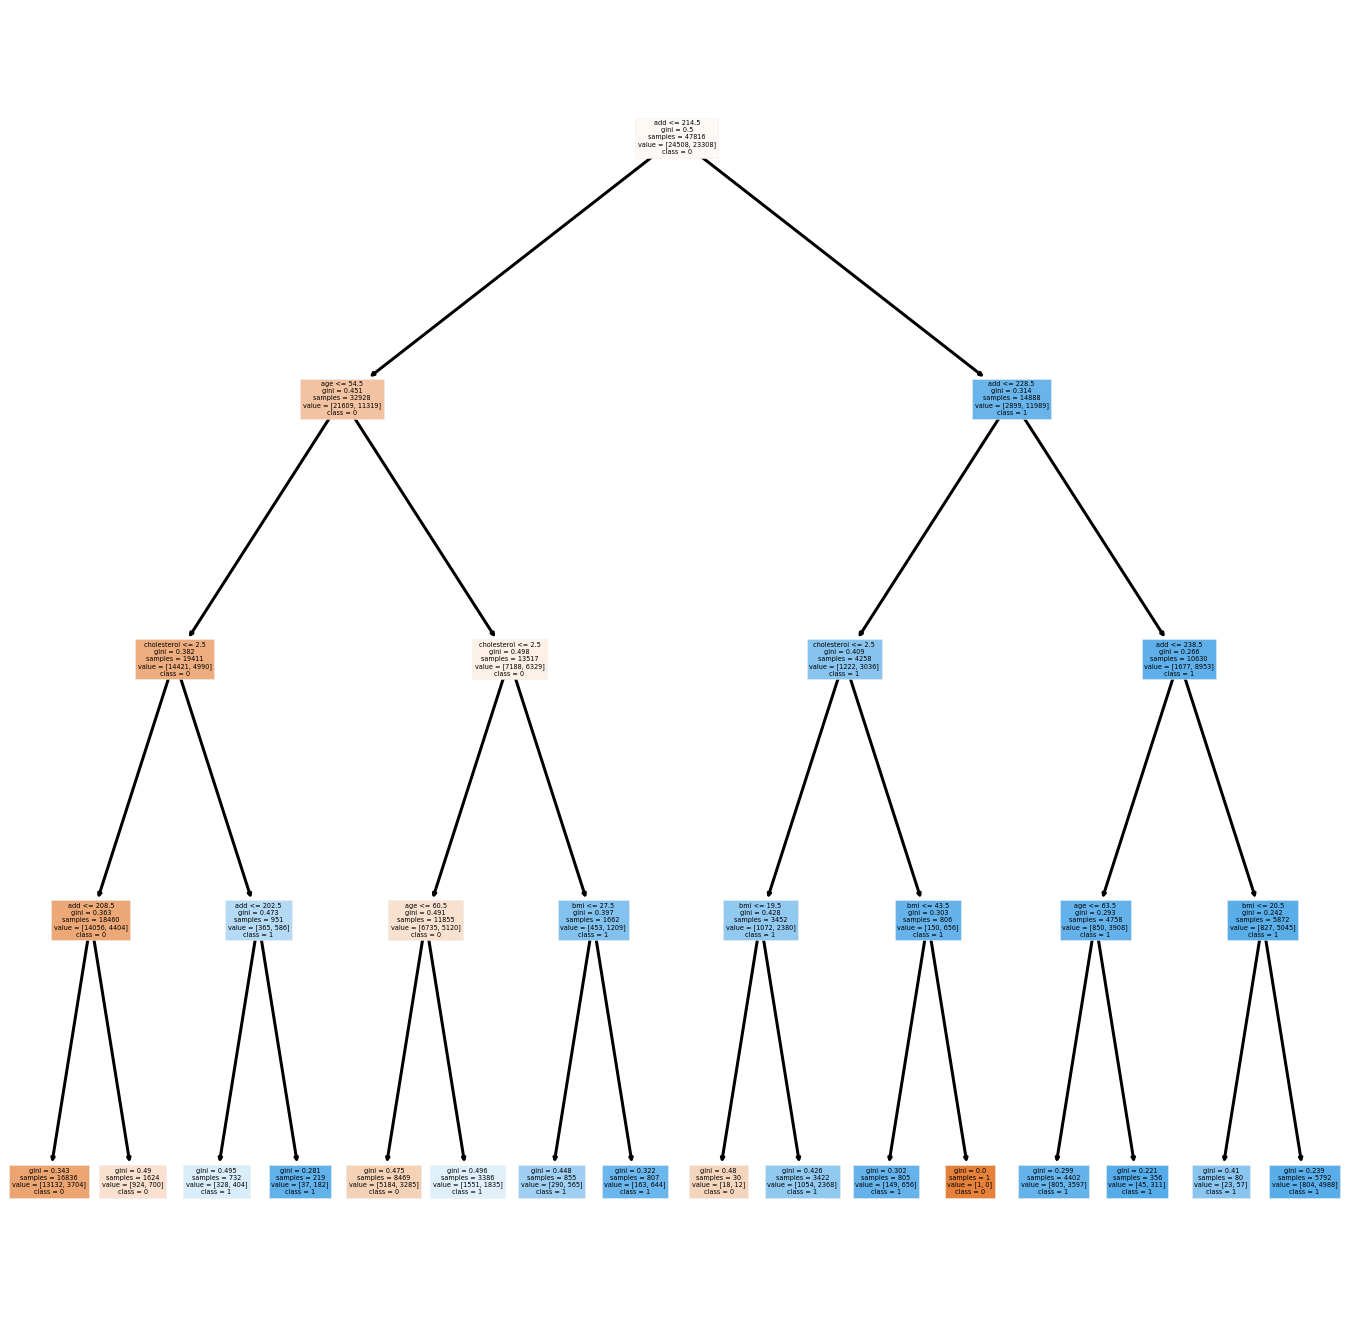

In [268]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 24))
out = plot_tree(dectree, 
          feature_names = x_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

As seen from the above decision tree, the factors that affect the prediction of cardiovascular disease are split based on the following factors:
- Add : 5 times
- BMI: 4 times
- Cholesterol: 3 times
- Age: 3 times

It seems that the greatest deciding factor of cardiovascular diseases is blood pressure of an individual. This matches the correlation of blood pressure to cardio as shown previously in the Correlation Heatmap.

### Univariate modelling of each of the highest correlating factors to cardio

Now, we will explore the univariate analysis of each factor to see if any of the factors, including the blood pressure which has the highest correlation to cardio will have a higher accuracy prediction of cardiovascular disease. 

### Blood Pressure (Add)

In [269]:
y = pd.DataFrame(cardio["cardio"])
x = pd.DataFrame(cardio["add"])

In [270]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [271]:
# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (47816, 1) (47816, 1)
Test Set  : (15939, 1) (15939, 1)


In [272]:
# Summary Statistics for Response
y_train["cardio"].value_counts()

0    24508
1    23308
Name: cardio, dtype: int64

In [273]:
x_train.describe()

,add
count,47816.000000
mean,207.328049
std,24.160878
min,44.000000
25%,200.000000
50%,200.000000
75%,220.000000
max,380.000000


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7107662707043667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7053140096618358



<AxesSubplot:>

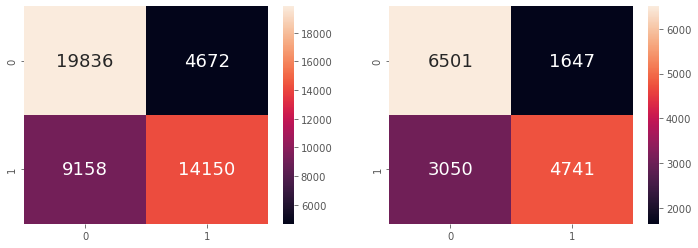

In [274]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



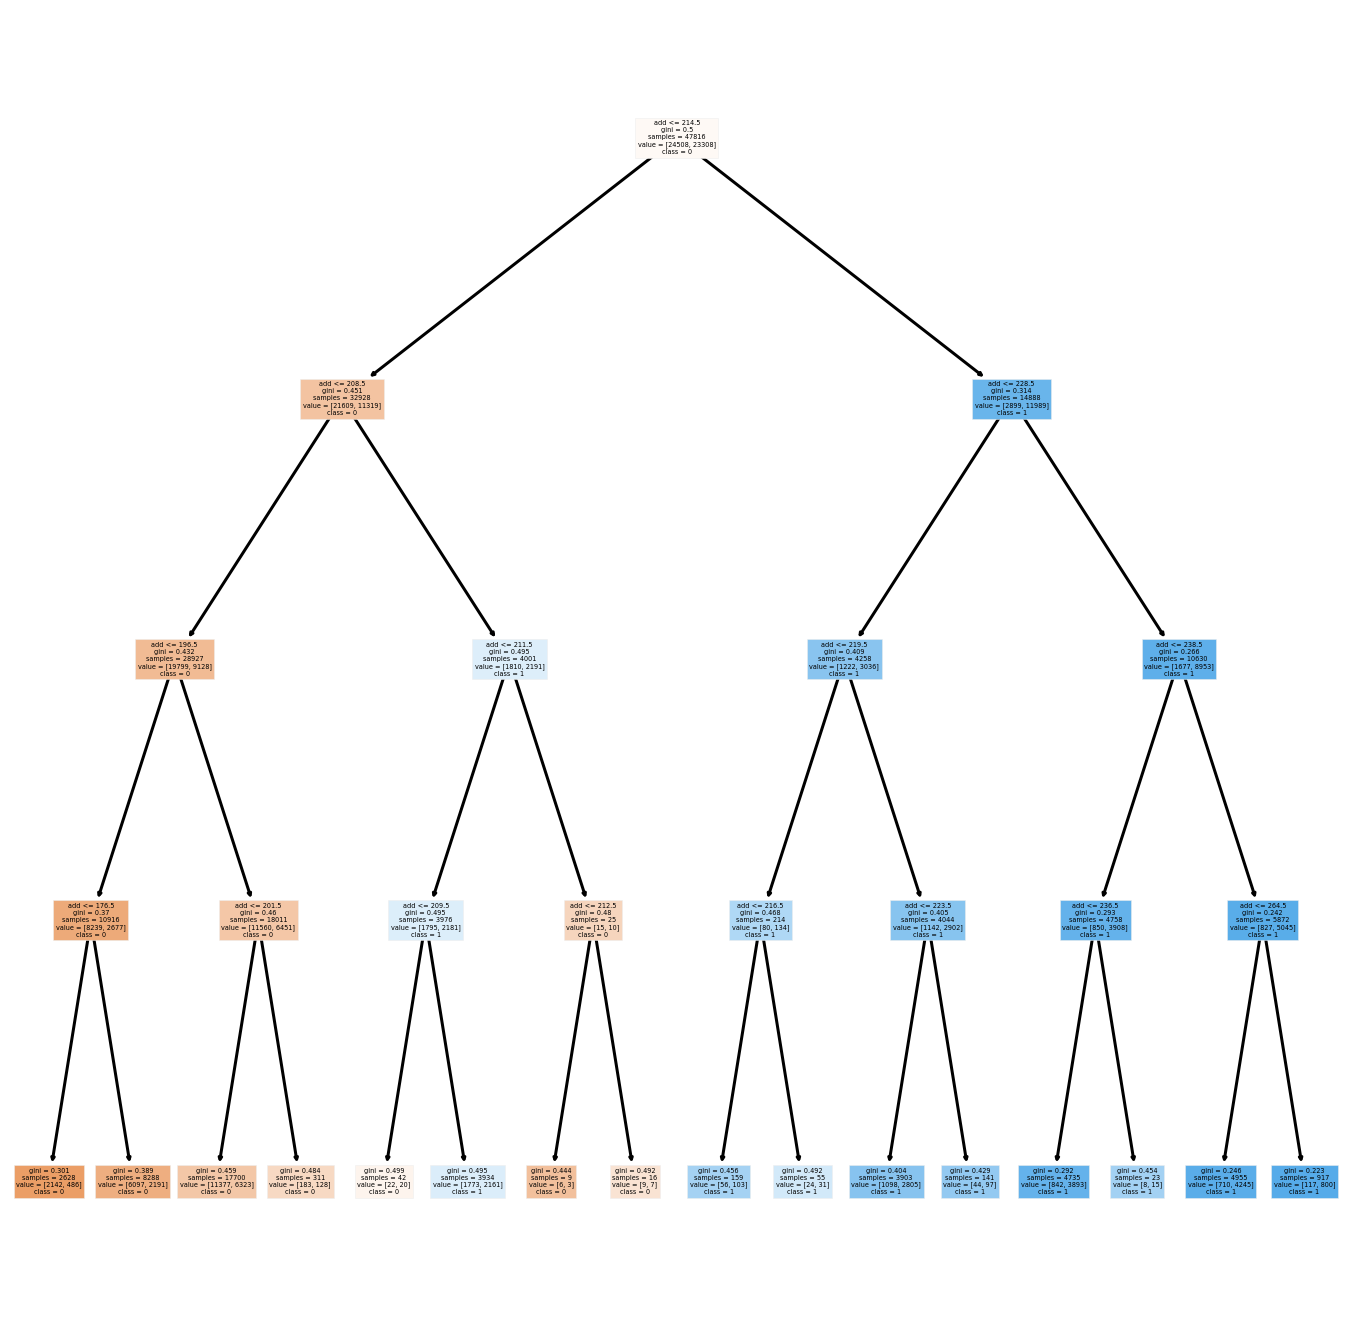

In [275]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 24))
out = plot_tree(dectree, 
          feature_names = x_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

### Age

In [276]:
y = pd.DataFrame(cardio["cardio"])
x = pd.DataFrame(cardio["age"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

# Summary Statistics for Response
y_train["cardio"].value_counts()

x_train.describe()

Train Set : (47816, 1) (47816, 1)
Test Set  : (15939, 1) (15939, 1)


,age
count,47816.000000
mean,53.296679
std,6.762751
min,30.000000
25%,48.000000
50%,54.000000
75%,58.000000
max,65.000000


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6004057219340806

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6042411694585608



<AxesSubplot:>

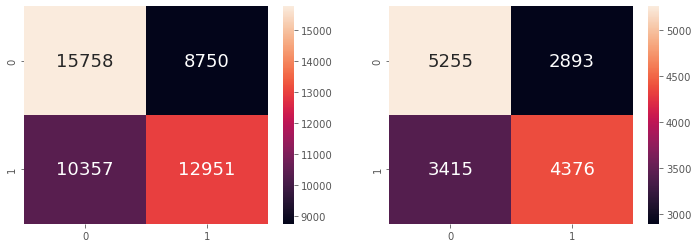

In [277]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



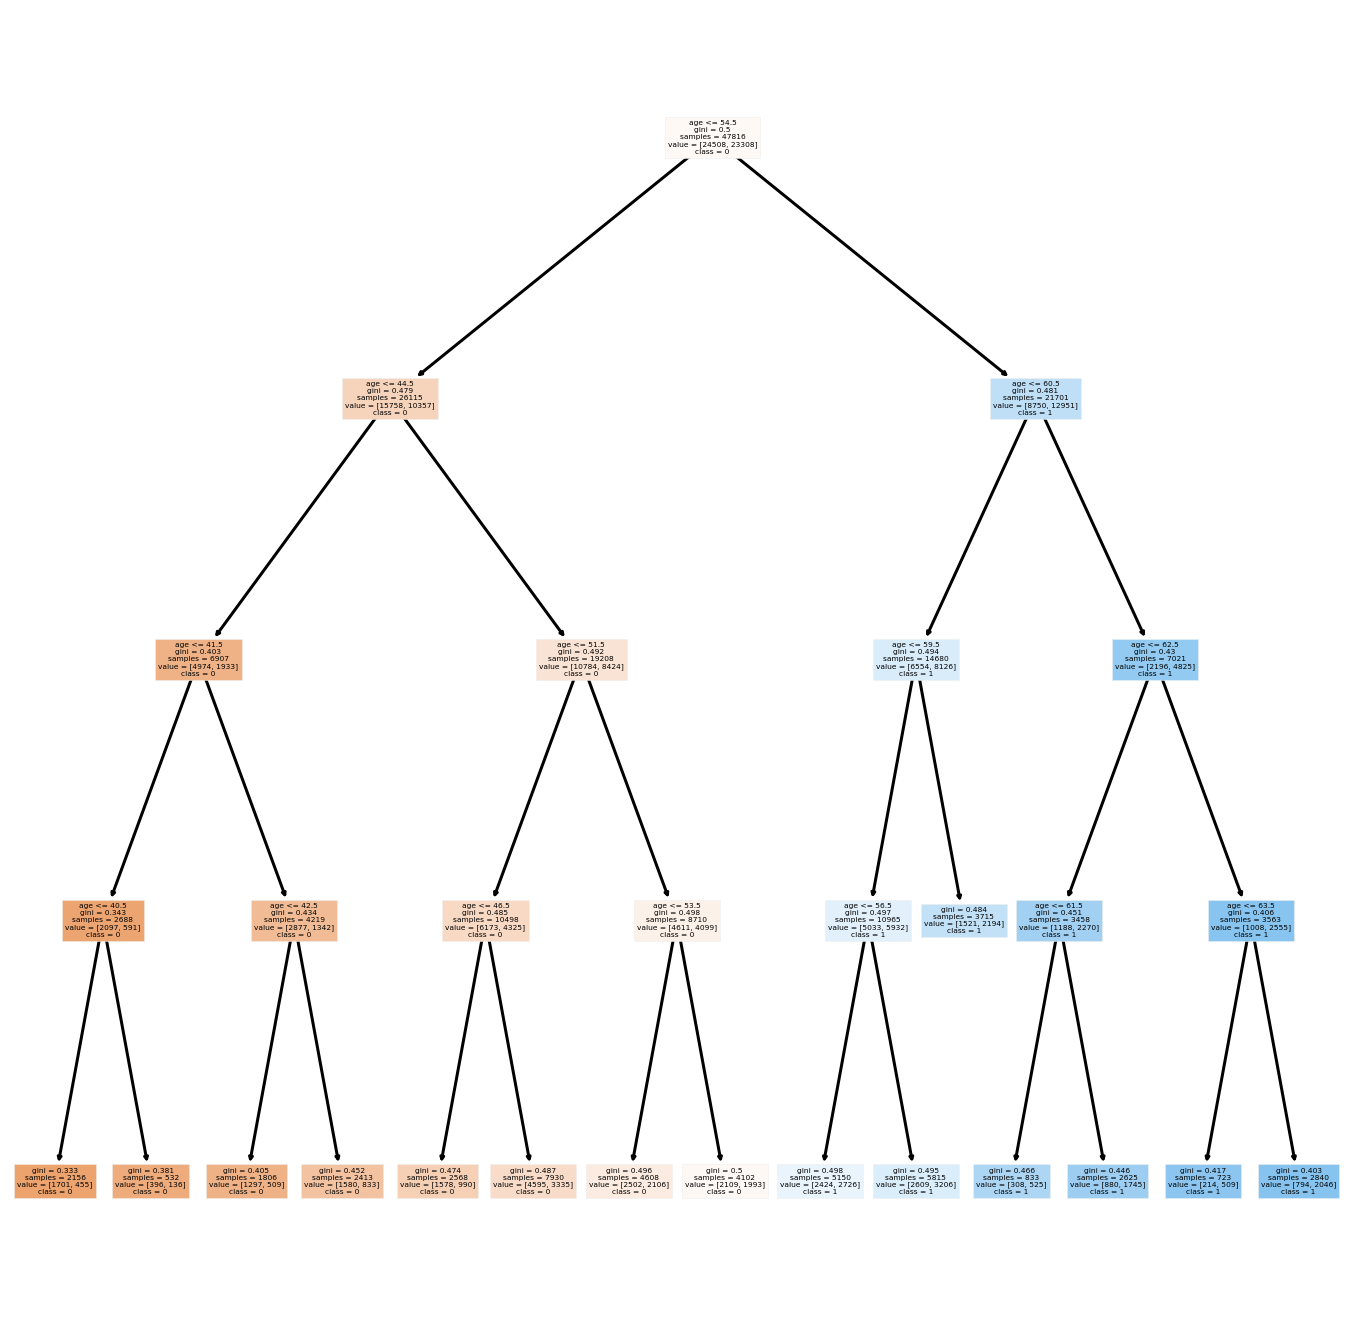

In [278]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 24))
out = plot_tree(dectree, 
          feature_names = x_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

### Cholesterol

In [279]:
y = pd.DataFrame(cardio["cardio"])
x = pd.DataFrame(cardio["cholesterol"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

# Summary Statistics for Response
y_train["cardio"].value_counts()

x_train.describe()

Train Set : (47816, 1) (47816, 1)
Test Set  : (15939, 1) (15939, 1)


,cholesterol
count,47816.000000
mean,1.355990
std,0.672651
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5942362389158441

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5892465022899805



<AxesSubplot:>

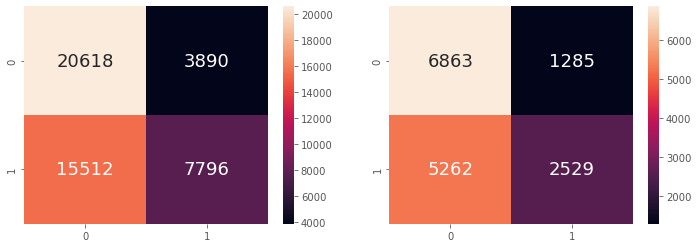

In [280]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



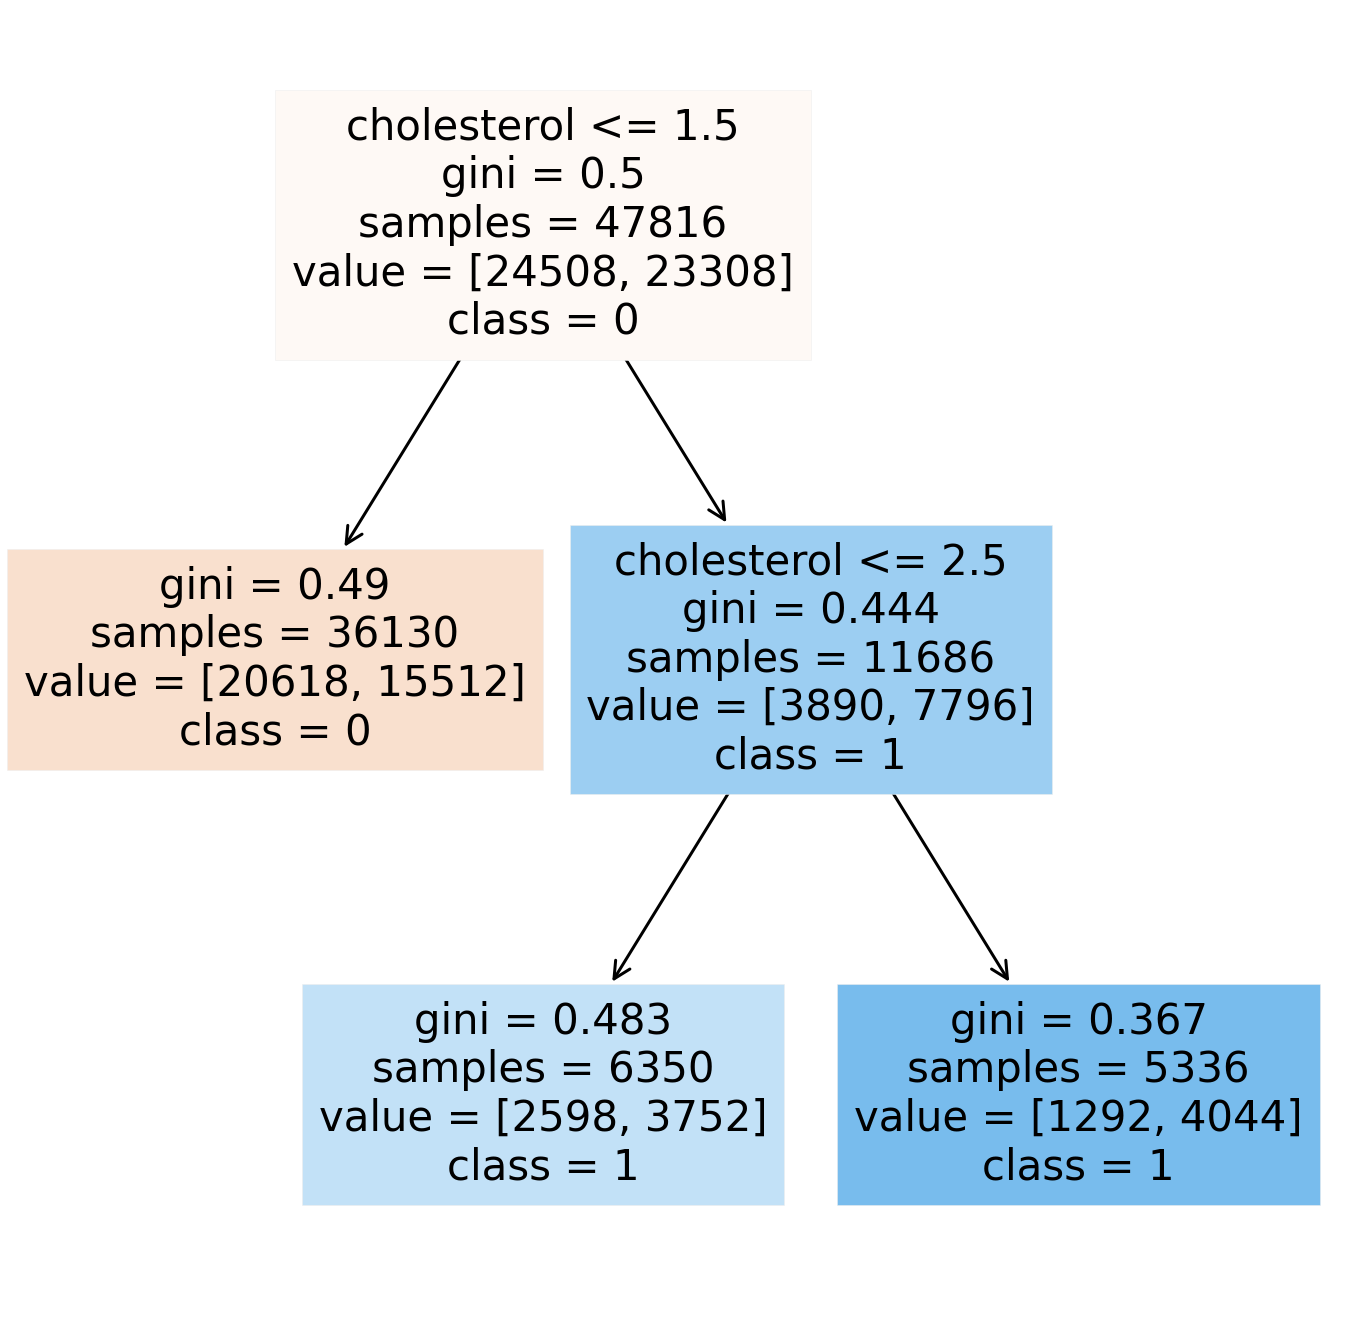

In [281]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 24))
out = plot_tree(dectree, 
          feature_names = x_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [282]:
y = pd.DataFrame(cardio["cardio"])
x = pd.DataFrame(cardio["bmi"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

# Summary Statistics for Response
y_train["cardio"].value_counts()

x_train.describe()

Train Set : (47816, 1) (47816, 1)
Test Set  : (15939, 1) (15939, 1)


,bmi
count,47816.000000
mean,26.968086
std,4.406414
min,15.000000
25%,24.000000
50%,26.000000
75%,30.000000
max,46.000000


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5781328425631588

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5760085325302716



<AxesSubplot:>

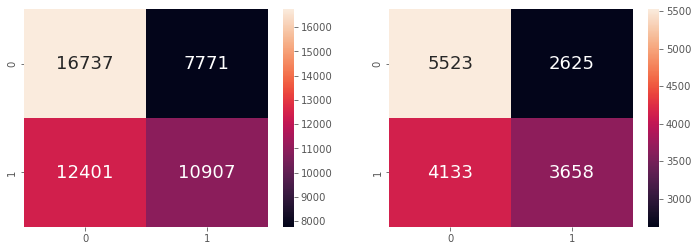

In [283]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



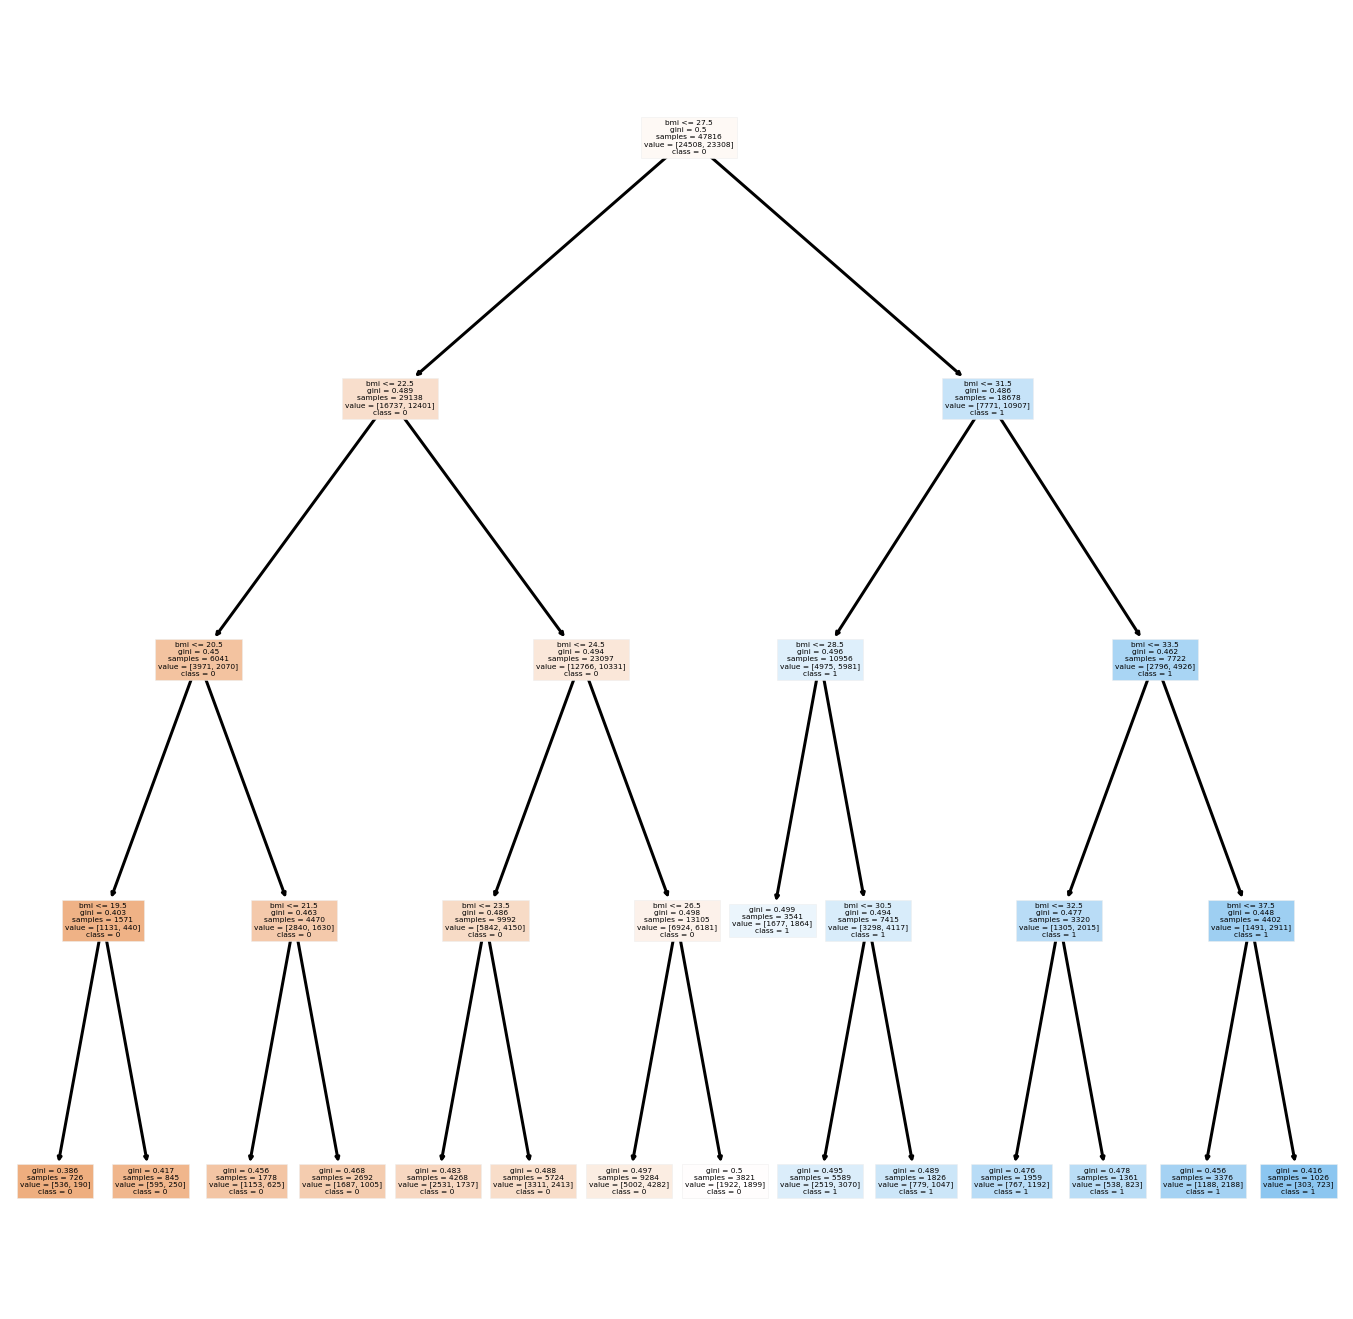

In [284]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 24))
out = plot_tree(dectree, 
          feature_names = x_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

As seen from the 4 univariate decision trees above, none have a classification accuracy higher than if we use a multivariate model of all 4 factors combined. This shows that when accounting for the prediction of one having cardiovascular disease or not, we need to consider multiple factors rather than one factor to make a conclusive prediction.

However, we need to take into the account of the following loopholes:

Overfitting (where a model interprets meaning from irrelevant data if a decision tree’s design is too complex). This can be seen when the classification accuracy of the test data is much lower than that of the train dataset.


If when training each tree in the forest, we give every tree the same data, we would get the same predictions that are prone to overfitting. In order to train the decision trees differently we need to provide slightly different data to each tree. To do this, we choose a random subset of the data to give to each tree. When training each node in the tree, we also randomize which features can be used to split the data. The final prediction is based on a vote or the average taken across all the decision trees in the forest.


Here, we would like to use Random Forest Regression Model to see if it is a better model as compared to Decision Tree model. 

In order to understand random forest regression, we will need to understand the process in which random forest regression works. 

1. We develop a forest of many decision tree models.

2. We grow a forest of many decision trees model (R default is 500) where each decision tree uses an independent *bootstrap sample from the training data. 
*Bootstrapping is where we choose a random subset of the data to feed into each decision tree model. 

3. Then, at each node:
- Select m variables at random out of all M possible variables (independently for each node).
- Find the best split on the selected m variables.

4. We then grow the trees to maximum depth level based on classification of the Gini Coefficient for each node. Finally, we vote/average the trees to get predictions for new data.

Overall, we created random subsamples of data to make an ensemble of classifiers which are combined under Random Forest Regression. This method is also known as bagging.

### 4.3 Random Forest Regression

In [285]:
# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)


Train Set : (47816, 1) (47816, 1)
Test Set  : (15939, 1) (15939, 1)


In [286]:
#Same dataset prepared for DecisionTree, ut used for Random Forest Regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train= y_train.values.ravel()
# Model Training 
rfc = RandomForestClassifier(n_estimators=500, max_depth = 4)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)


Model Evaluation (Random Forest)
   Accuracy (in %): 57.17%
   Precision (in %): 56.09%
   F1-score (in %): 55.37

Metrics for Predicted (Test Data)
   True Positive Rate: 54.67%
   False Positive Rate: 40.47%
   False Negative Rate: 45.33%



C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConver

Cross-validation Score:
0.709 accuracy with a standard deviation of 0.0025



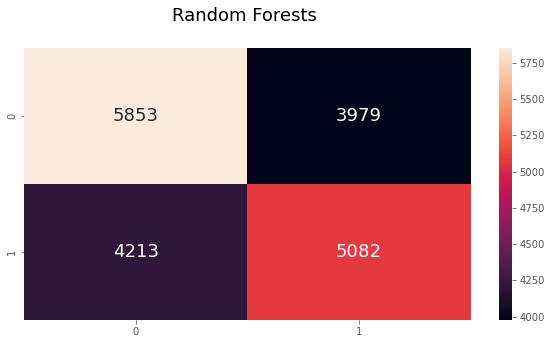

In [287]:
# Confusion Matrix
f, axes = plt. subplots(1,1, figsize = (10, 5))
rfc_cm = confusion_matrix(y_test, rfc_pred)
axes.axes.set_title("Random Forests \n", fontsize=18)
sb.heatmap(rfc_cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

## Metrics Calculation
rfc_acc_1 = accuracy_score(y_test, rfc_pred)*100
rfc_prec_1 = precision_score(y_test, rfc_pred)*100
rfc_f1score_1 = f1_score(y_test, rfc_pred)*100


#** Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
#Error is not resovled. No average param in accuracy_score, precision_score or f1_score. Suggested troubleshoot say input
# average = ['weighted', 'None', 'Macro', 'Micro']. Contradictory solution. Need to explore further.

TN = rfc_cm[0][0]
FP = rfc_cm[0][1]
FN = rfc_cm[1][0]
TP = rfc_cm[1][1]

# Include precision & F1-score 
print("Model Evaluation (Random Forest)")
print("   Accuracy (in %): {:.2f}%".format(rfc_acc_1))
print("   Precision (in %): {:.2f}%".format(rfc_prec_1))
print("   F1-score (in %): {:.2f}\n".format(rfc_f1score_1))

# Include breakdown 
print("Metrics for Predicted (Test Data)")
print("   True Positive Rate: {x}%".format(x=round(100*TP/(TP+FN), 2)))
print("   False Positive Rate: {x}%".format(x=round(100*FP/(TN+FP), 2)))
print("   False Negative Rate: {x}%\n".format(x=round(100*FN/(TP+FN), 2)))

# Cross-validation 
scores=cross_val_score(rfc, X, y, cv=5)
print("Cross-validation Score:")
print("%0.3f accuracy with a standard deviation of %0.4f\n" % (scores.mean(), np.std(scores)))

Usually in statistics, mean squared error (MSE) of model = the sum of the squared bias of its predictions, the variance of those predictions, and the variance of some error term 𝜖. As both squared bias and variance are > 0, and 𝜖, which captures unpredictable randomness in the data, we want to minimize MSE by minimizing the variance and bias of our model.

Random forest regression reduce overfitting by reducing the variance.

Variance,in some sense captures the generalizability of the model. More accurately, it measures how much our prediction would change we train a model on different data. 

High variance = overfitting to training data, finding patterns and complexity that are a product of randomness as opposed to some real trend. 

A more complex or flexible model will tend to have high variance due to overfitting but lower bias because, averaged over several predictions, the model more accurately predicts the target variable. Likewise, an underfit or oversimplified model, while having lower variance, will likely be more biased since it lacks the tools to fully capture trends in the data.

Decision Trees are models with extremely low bias because they maximally overfit to the training data without pruning. This overfitting, however, also results in unacceptably high variance and consequently poor predictions on unseen data. 

As such, through bagging (or bootstrap aggregating), we reduce the variance by vote/average the many decision trees (that have weak classifiers) to get better predictions for new data as compared to a single decision tree model.

# Conclusion

All in all, both the Decision Tree and Random Forest Regression models are far from perfect, as seen from the correlation and the results we obtained. However, our group felt that utilising a Decision Tree model for starters, and then trying to improve it with a Random Forest Regression was the best way forward to deal with both our cleaned data set and problem statement. Thus, we believe that Data Science is still a useful tool in predicting Cardiovascular Diseases